In [1]:
library(openxlsx)
library(psych)
library(ggplot2)
library(rworldmap)
library(classInt)
library(RColorBrewer)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Loading required package: sp

### Welcome to rworldmap ###

For a short introduction type : 	 vignette('rworldmap')



In [2]:
df = read.csv("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/4_6解析結果可視化用.csv")

In [3]:
head(df)

,X,country,date_first,exp1_y_hat,exp1_resid,exp1_gamma,exp2_y_hat,exp2_resid,exp2_gamma
,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Albania,70,59.69512,10.304882,0.4525665,67.42478,2.575225,1.234010e-14
2,1,Algeria,58,74.44309,-16.443089,0.5093896,72.27018,-14.270177,2.581862e-06
3,2,Angola,83,77.01450,5.985504,0.4506174,74.21249,8.787509,7.655006e-23
4,3,Argentina,65,68.52933,-3.529328,0.3714925,57.80357,7.196429,8.740803e-11
5,4,Australia,26,36.74449,-10.744490,0.5859793,27.14959,-1.149587,9.950818e-01
6,5,Austria,58,55.93808,2.061916,0.4391085,62.91377,-4.913773,1.339967e-07


In [4]:
map_obj <- joinCountryData2Map(df, joinCode="NAME", nameJoinColumn="country")

147 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
96 codes from the map weren't represented in your data


# exp1

pdf 
  2

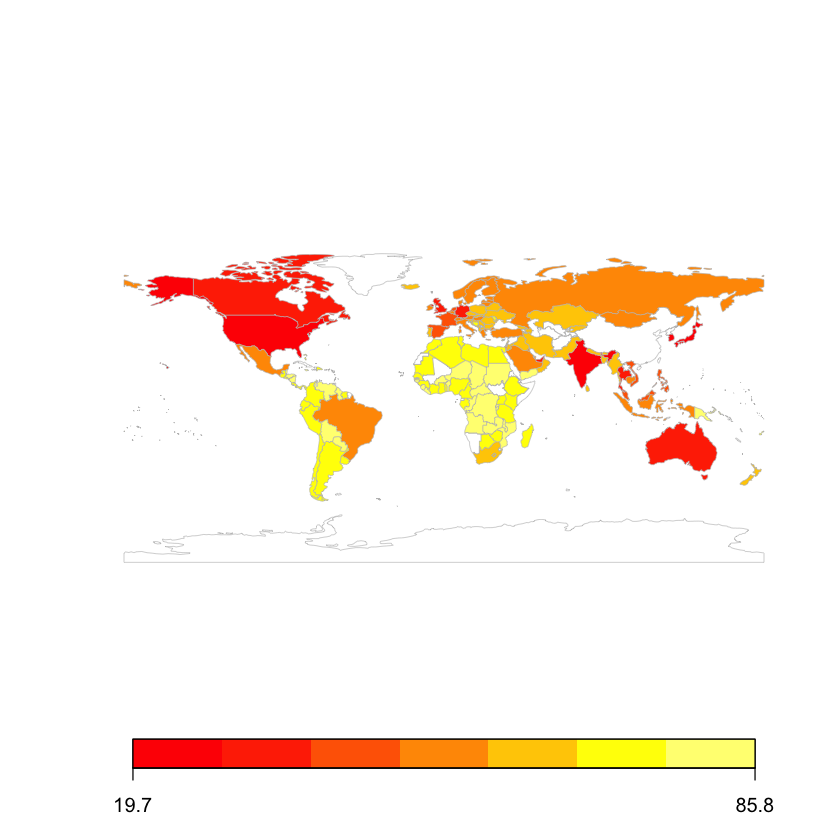

In [5]:
# y_hat
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_y_hat_world.eps")
mapCountryData(map_obj, nameColumnToPlot="exp1_y_hat"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=heat.colors(7)
              ,mapTitle = "")

dev.off()

mapCountryData(map_obj, nameColumnToPlot="exp1_y_hat"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=heat.colors(7)
              ,mapTitle = "")

pdf 
  2

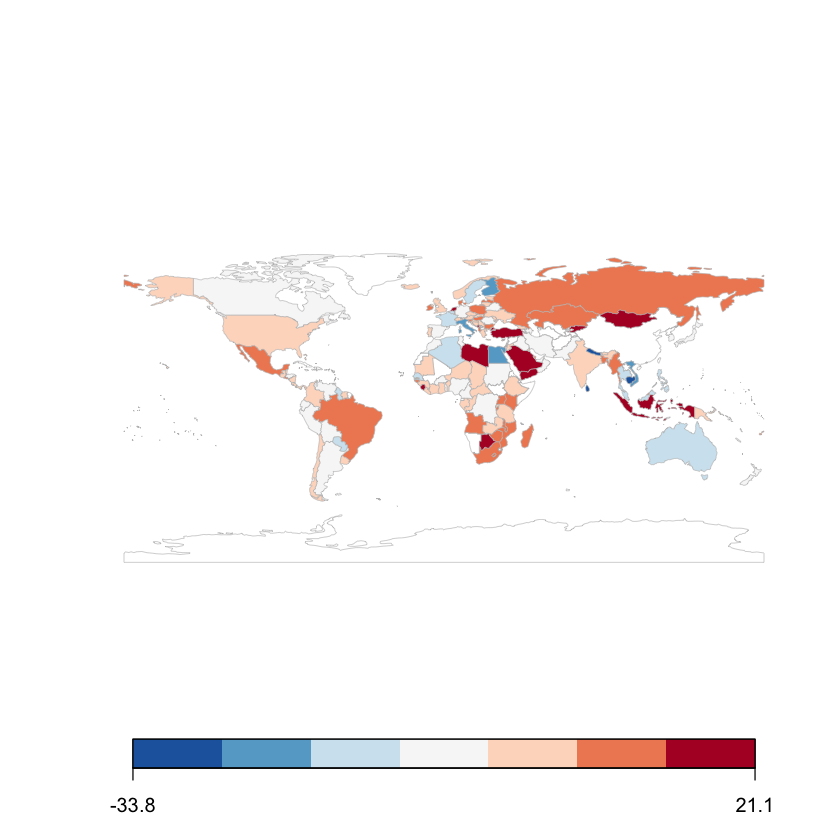

In [6]:
# 残差
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_resid_world.eps")

mapCountryData(map_obj, nameColumnToPlot="exp1_resid"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=rev(brewer.pal(7, "RdBu"))
               , missingCountryCol = NA
              ,mapTitle = "")

dev.off()

mapCountryData(map_obj, nameColumnToPlot="exp1_resid"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=rev(brewer.pal(7, "RdBu"))
               , missingCountryCol = NA
              ,mapTitle = "")

pdf 
  2

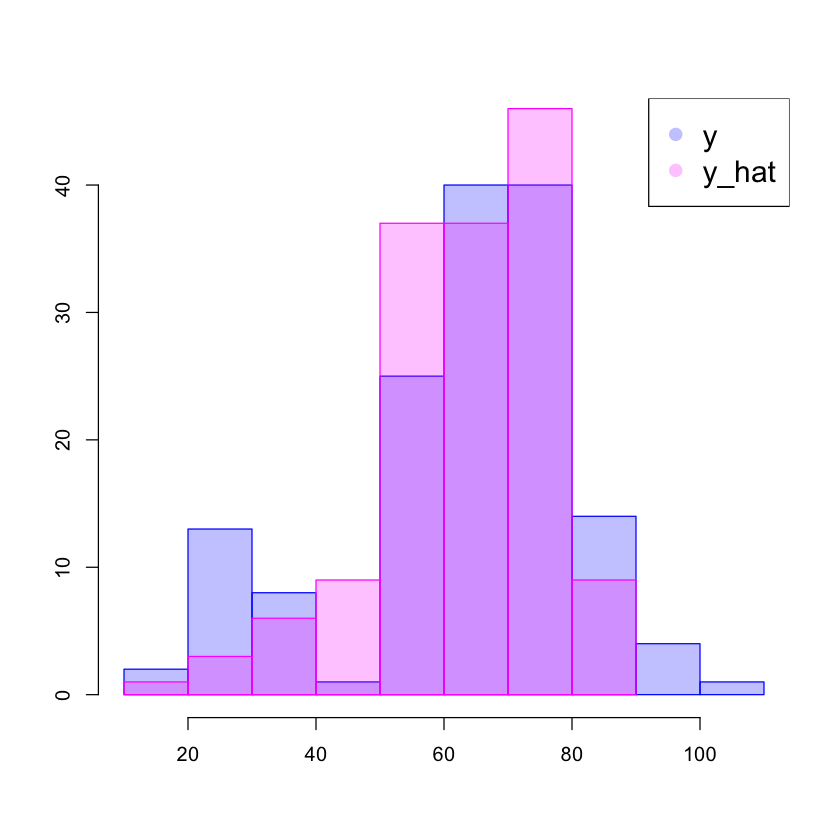

In [7]:
pdf("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_y_y_hat.pdf") 

hist(df$date_first, col = "#0000ff40", border = "#0000ff", main="", xlab="", ylab="", ylim=c(0, 45))
hist(df$exp1_y_hat, col = "#ff00ff40", border = "#ff00ff", add = TRUE, main="", xlab="", ylab="", ylim=c(0, 45))
legend("topright", legend=c("y", "y_hat"), col=c("#0000ff40", "#ff00ff40"), pch=16, cex=1.5)
dev.off()

hist(df$date_first, col = "#0000ff40", border = "#0000ff", main="", xlab="", ylab="", ylim=c(0, 45))
hist(df$exp1_y_hat, col = "#ff00ff40", border = "#ff00ff", add = TRUE, main="", xlab="", ylab="", ylim=c(0, 45))
legend("topright", legend=c("y", "y_hat"), col=c("#0000ff40", "#ff00ff40"), pch=16, cex=1.5)

In [8]:
head(sort(df$exp1_gamma))

[1] 1.269979e-29 2.064823e-02 9.188122e-02 1.501558e-01 1.768076e-01
[6] 3.125422e-01

pdf 
  2

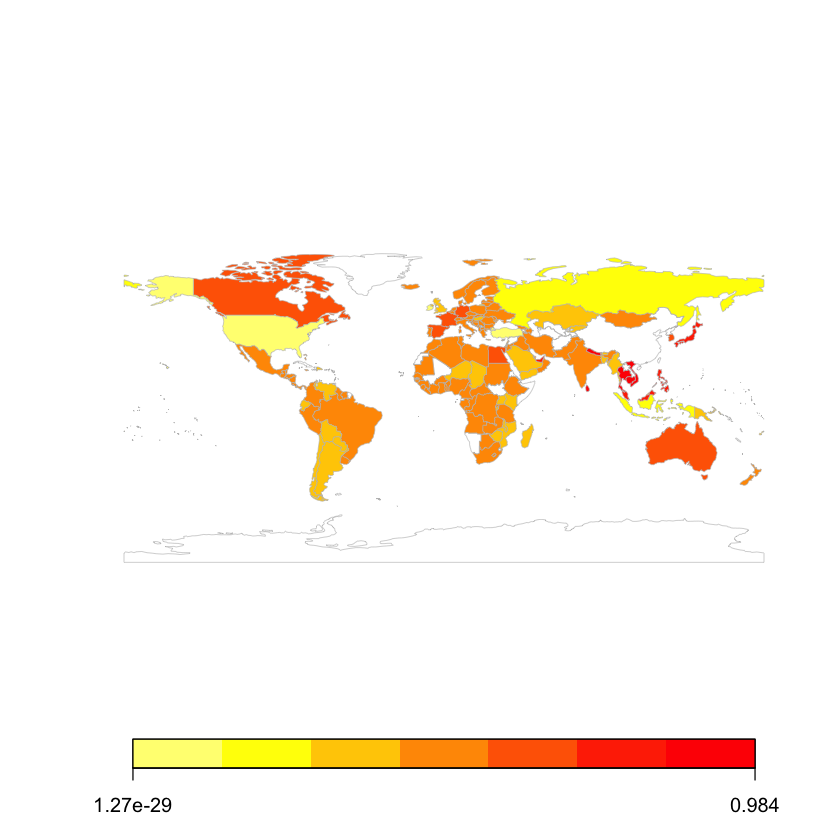

In [9]:
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_gamma_world.eps")
mapCountryData(map_obj, nameColumnToPlot="exp1_gamma"
               , catMethod="fixedWidth"
               , addLegend = TRUE
              ,mapTitle = "")

dev.off()

mapCountryData(map_obj, nameColumnToPlot="exp1_gamma"
               , catMethod="fixedWidth"
               , addLegend = TRUE
              ,mapTitle = "")

pdf 
  2

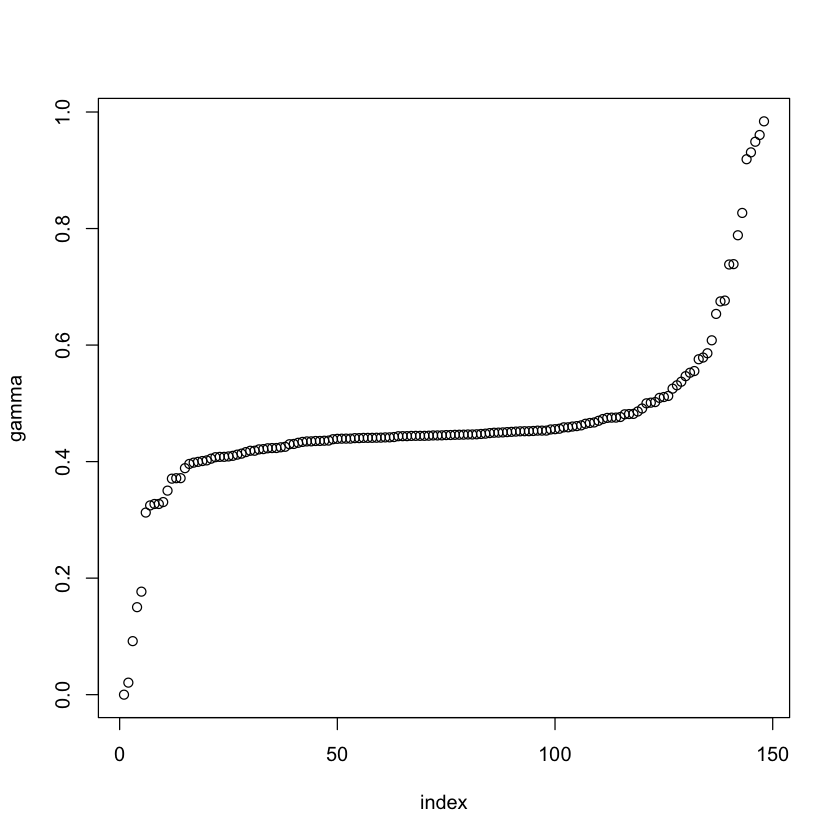

In [10]:
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_gamma.eps")
plot(sort(df$exp1_gamma), xlab="index", ylab="gamma")
dev.off()

plot(sort(df$exp1_gamma), xlab="index", ylab="gamma")

Saving 7 x 7 in image



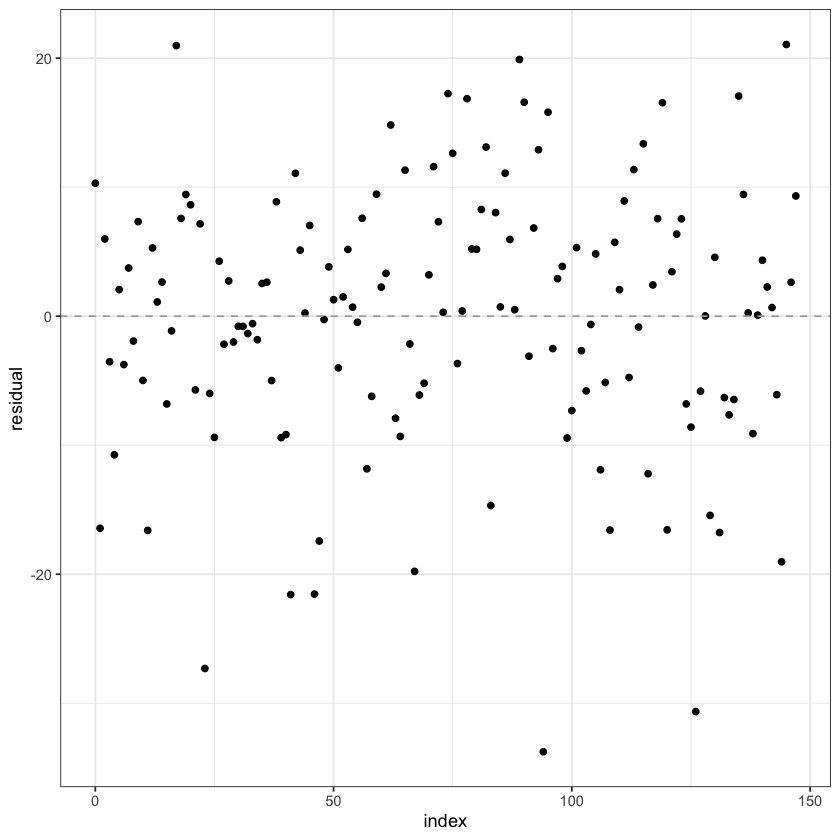

In [11]:
g<-ggplot(df, aes(x=df$X, y=df$exp1_resid)) + geom_point()　+ xlab("index")+ ylab("residual")
g <- g + theme_bw() + geom_hline(yintercept = 0, linetype=2,color="darkgrey") 
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_resid_scatter.eps")

Saving 7 x 7 in image



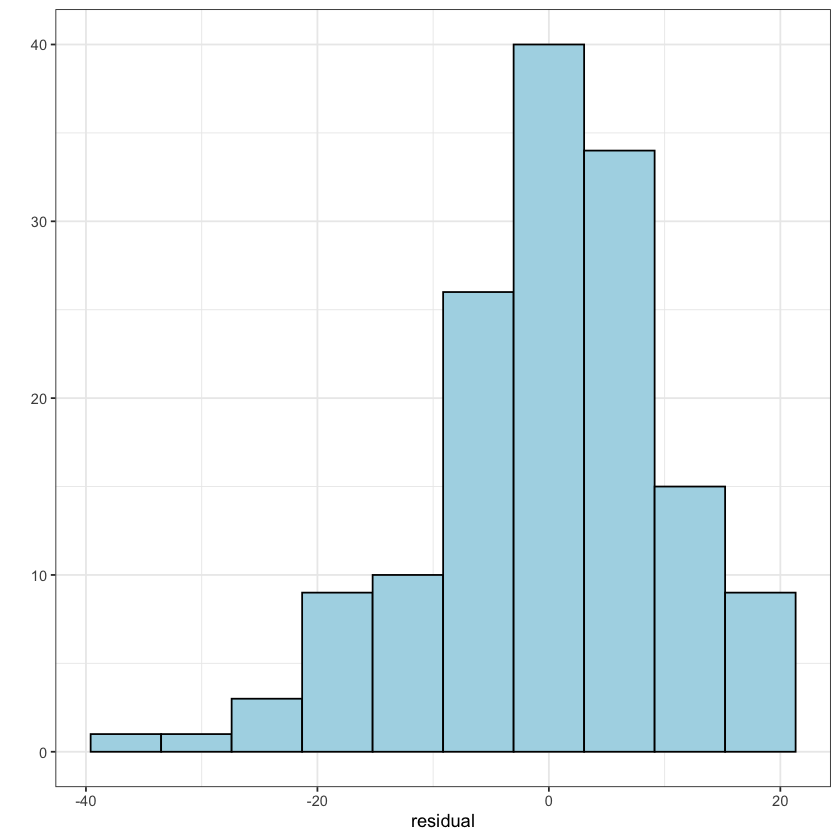

In [12]:
g <- ggplot(df, aes(x = df$exp1_resid))
g <- g + geom_histogram(color="black",fill="light blue", bins = 10) + theme_bw()+ xlab("residual")+ ylab("")
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp1_resid.eps")

# exp2

pdf 
  2

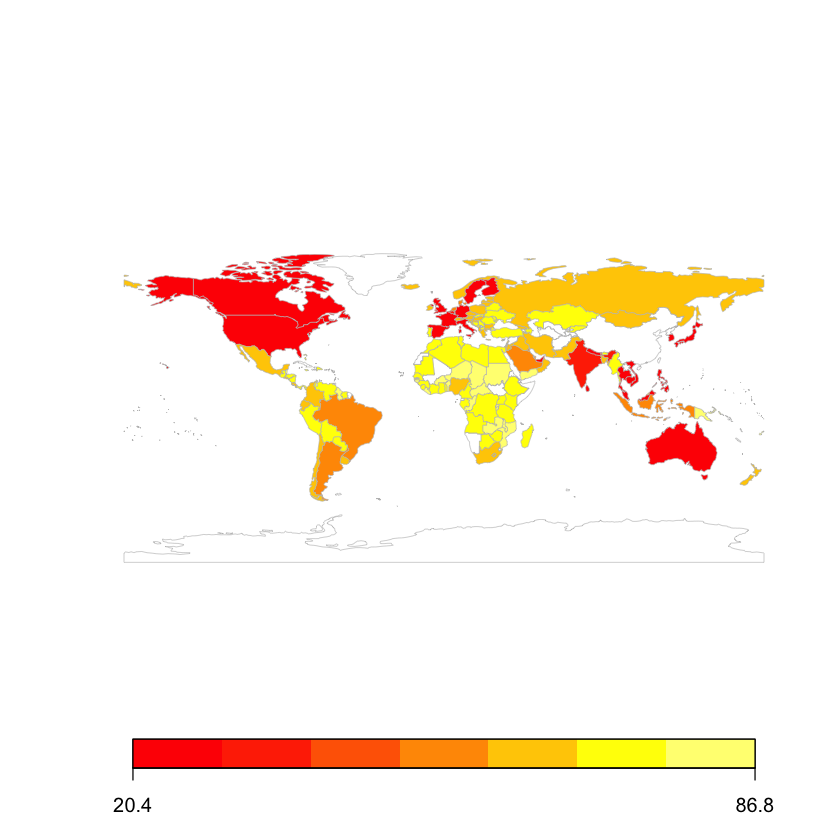

In [13]:
# y_hat
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_y_hat_world.eps")
mapCountryData(map_obj, nameColumnToPlot="exp2_y_hat"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=heat.colors(7)
              ,mapTitle = "")

dev.off()

mapCountryData(map_obj, nameColumnToPlot="exp2_y_hat"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=heat.colors(7)
              ,mapTitle = "")

pdf 
  2

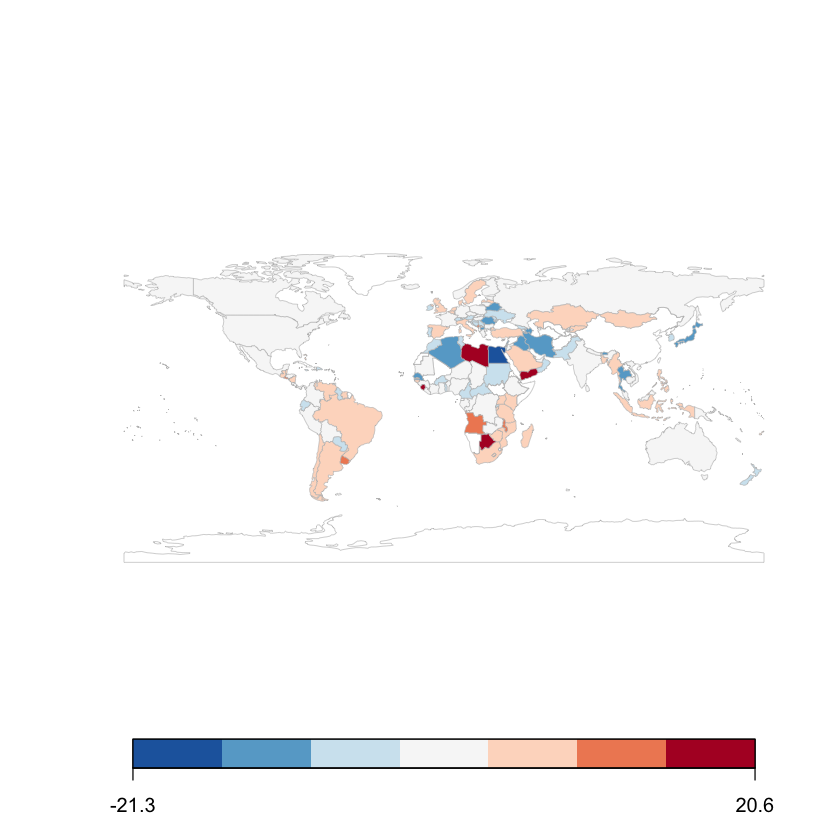

In [14]:
# 残差
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_resid_world.eps")

mapCountryData(map_obj, nameColumnToPlot="exp2_resid"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=rev(brewer.pal(7, "RdBu"))
               , missingCountryCol = NA
              ,mapTitle = "")

dev.off()

mapCountryData(map_obj, nameColumnToPlot="exp2_resid"
               , catMethod="fixedWidth"
               , addLegend = TRUE
               , colourPalette=rev(brewer.pal(7, "RdBu"))
               , missingCountryCol = NA
              ,mapTitle = "")

pdf 
  2

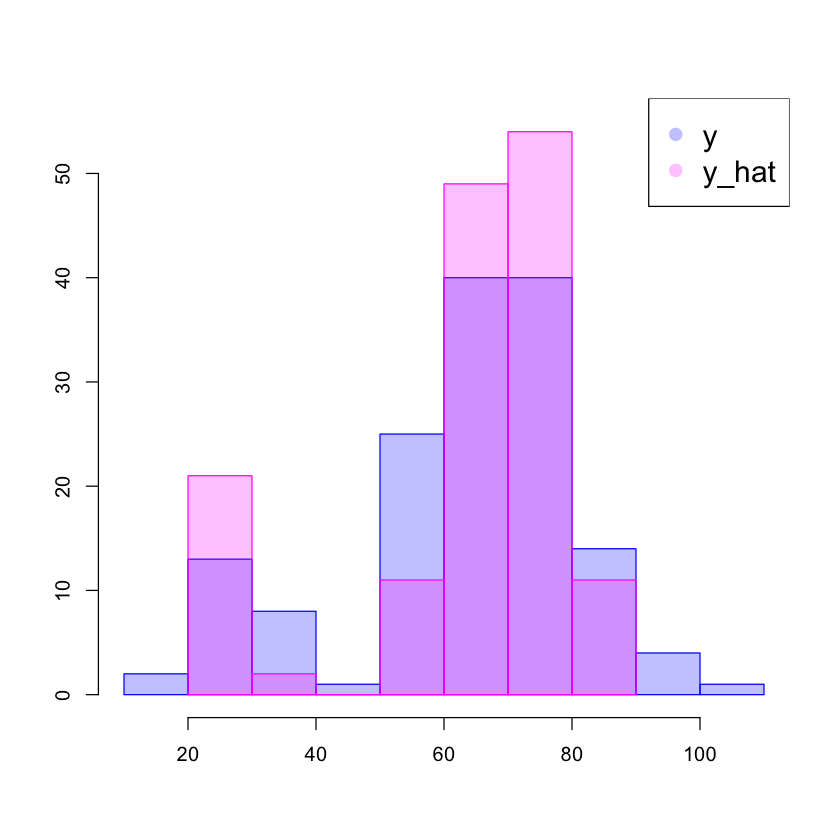

In [15]:
pdf("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_y_y_hat.pdf") 

hist(df$date_first, col = "#0000ff40", border = "#0000ff", main="", xlab="", ylab="", ylim=c(0, 55))
hist(df$exp2_y_hat, col = "#ff00ff40", border = "#ff00ff", add = TRUE, main="", xlab="", ylab="", ylim=c(0, 55))
legend("topright", legend=c("y", "y_hat"), col=c("#0000ff40", "#ff00ff40"), pch=16, cex=1.5)
dev.off()

hist(df$date_first, col = "#0000ff40", border = "#0000ff", main="", xlab="", ylab="", ylim=c(0, 55))
hist(df$exp2_y_hat, col = "#ff00ff40", border = "#ff00ff", add = TRUE, main="", xlab="", ylab="", ylim=c(0, 55))
legend("topright", legend=c("y", "y_hat"), col=c("#0000ff40", "#ff00ff40"), pch=16, cex=1.5)

pdf 
  2

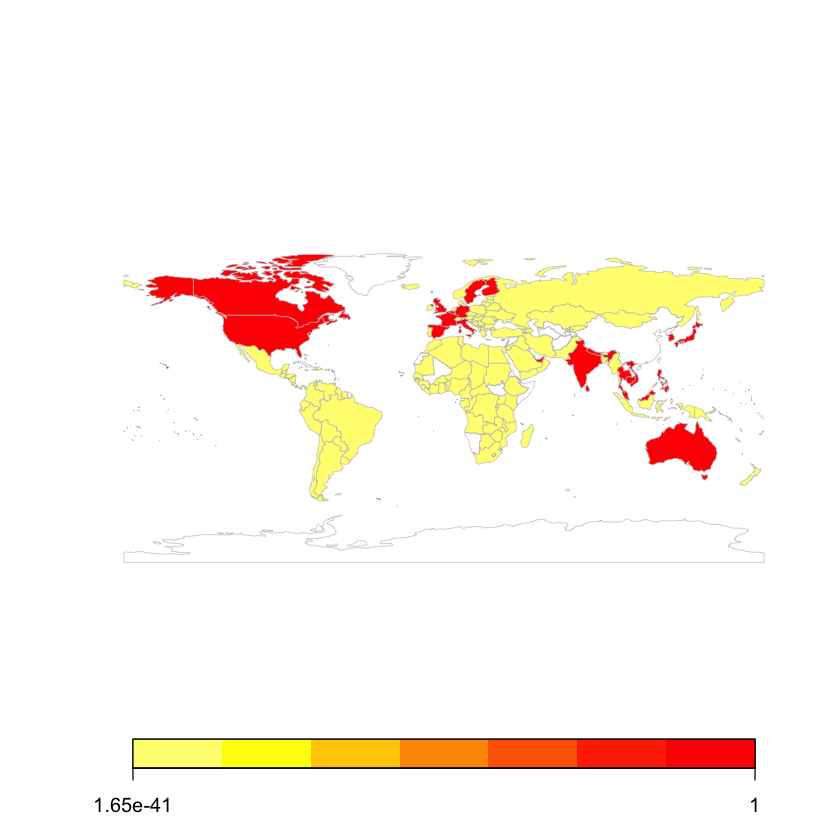

In [16]:
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_gamma_world.eps")
mapCountryData(map_obj, nameColumnToPlot="exp2_gamma"
               , catMethod="fixedWidth"
               , addLegend = TRUE
              ,mapTitle = "")

dev.off()

mapCountryData(map_obj, nameColumnToPlot="exp2_gamma"
               , catMethod="fixedWidth"
               , addLegend = TRUE
              ,mapTitle = "")

pdf 
  2

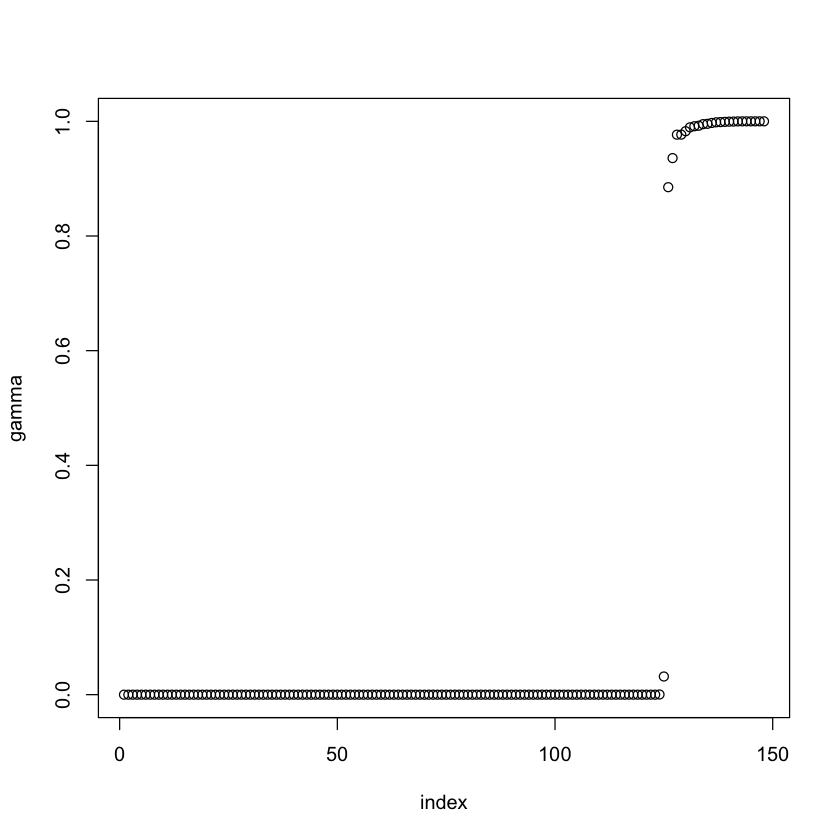

In [17]:
setEPS()
postscript("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_gamma.eps")
plot(sort(df$exp2_gamma), xlab="index", ylab="gamma")
dev.off()

plot(sort(df$exp2_gamma), xlab="index", ylab="gamma")

Saving 7 x 7 in image



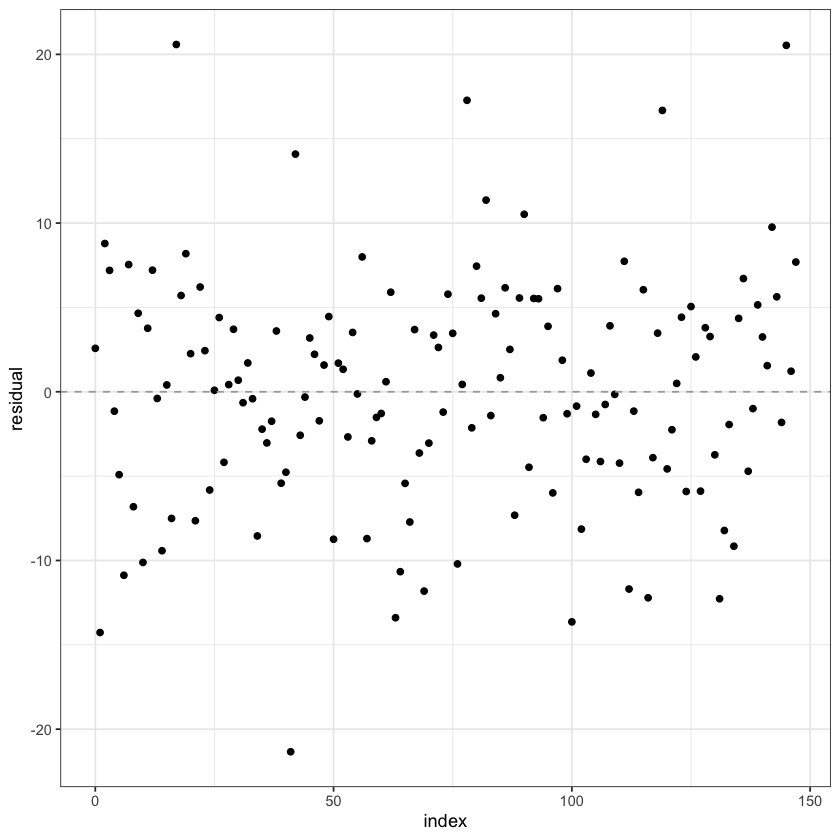

In [18]:
g<-ggplot(df, aes(x=df$X, y=df$exp2_resid)) + geom_point()　+ xlab("index")+ ylab("residual")
g <- g + theme_bw() + geom_hline(yintercept = 0, linetype=2,color="darkgrey") 
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_resid_scatter.eps")

Saving 7 x 7 in image



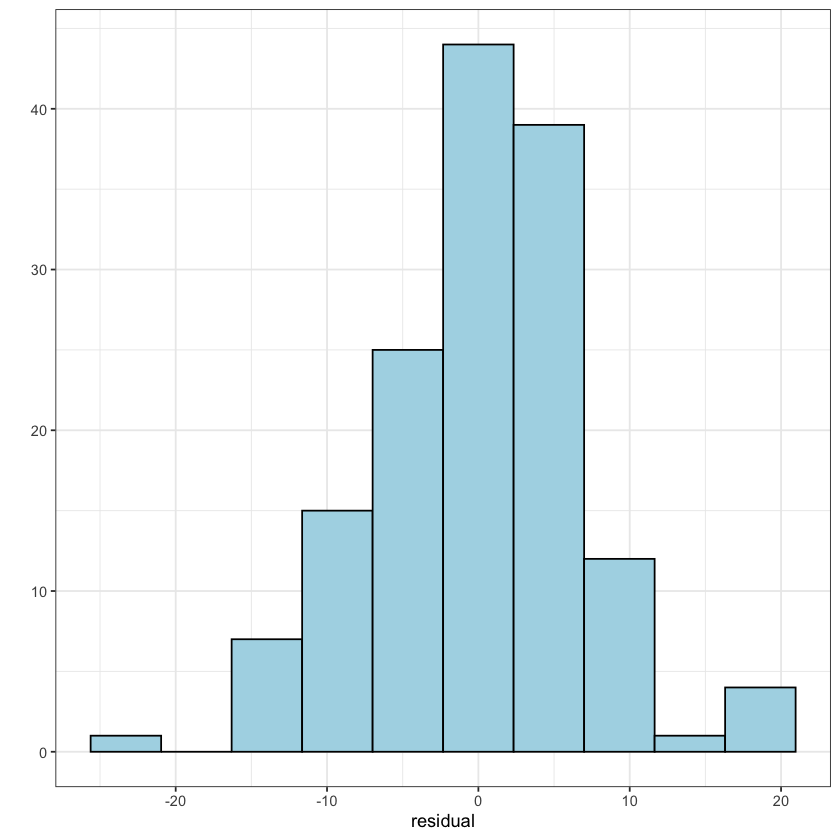

In [19]:
g <- ggplot(df, aes(x = df$exp2_resid))
g <- g + geom_histogram(color="black",fill="light blue", bins = 10) + theme_bw()+ xlab("residual")+ ylab("")
plot(g)

ggsave("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/修士論文/plot/exp2_resid.eps")